## Car Price Prediction Model

In [162]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [163]:
# Import Dataset
cars = pd.read_csv('CarPricePrediction.csv')

In [164]:
# dataset preview
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [165]:
# Checking the null values
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [166]:
# no. of rows and columns in dataset
cars.shape

(4340, 8)

In [167]:
# Checking the distribution
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [168]:
# As we can see in the above details that our 75% values lies in 60,00,000
# Here we have two value which is greater than 60,00,000 and these are outliers
cars[cars['selling_price']>6e6]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


<Axes: xlabel='fuel', ylabel='count'>

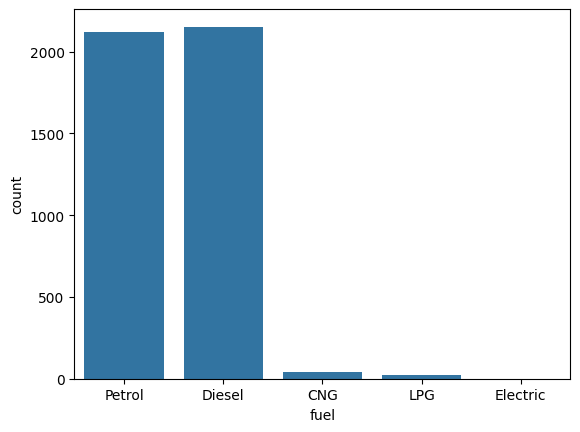

In [169]:
# This graph tells us that how many cars we have in different fuel types.
sns.countplot(x=cars['fuel'])

<Axes: xlabel='transmission', ylabel='count'>

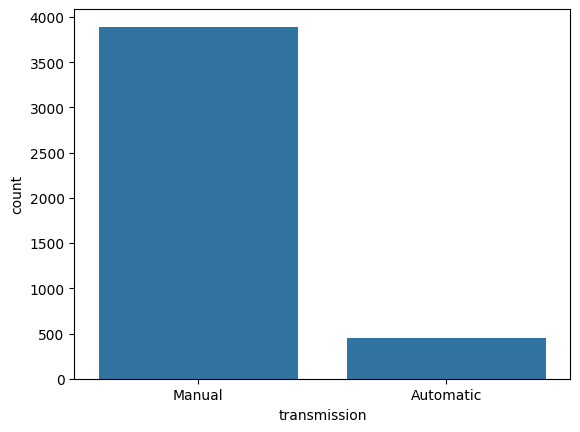

In [170]:
# This graph tells us that how many cars we have in different transmission types.
sns.countplot(x=cars['transmission'])

<Axes: xlabel='owner', ylabel='count'>

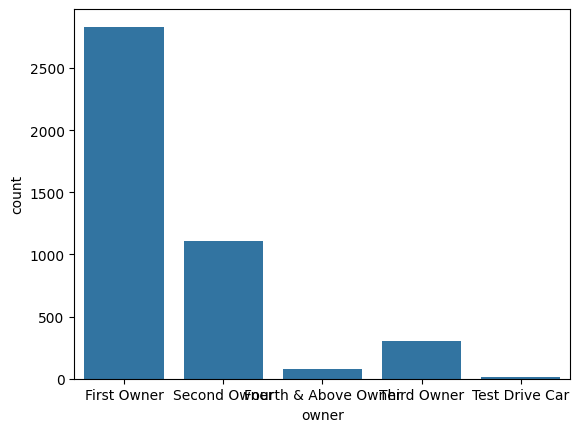

In [171]:
# This graph tells us that selling car is first hand, second hand or other.
sns.countplot(x=cars['owner'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\4190934878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['km_driven'])


<Axes: xlabel='km_driven', ylabel='Density'>

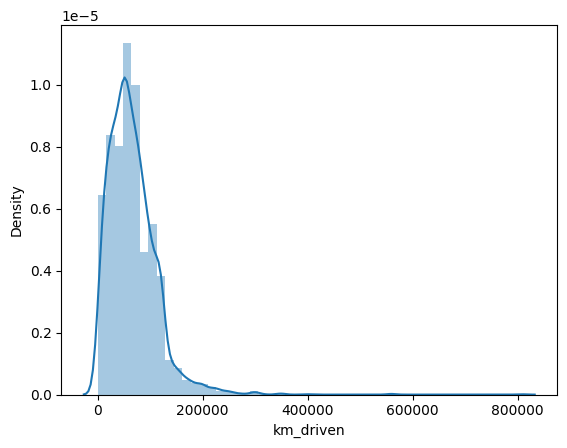

In [172]:
# This graph shows that our mostly cars driven between 0 to 1,80,000 km. 
sns.distplot(cars['km_driven'])

<Axes: xlabel='fuel', ylabel='selling_price'>

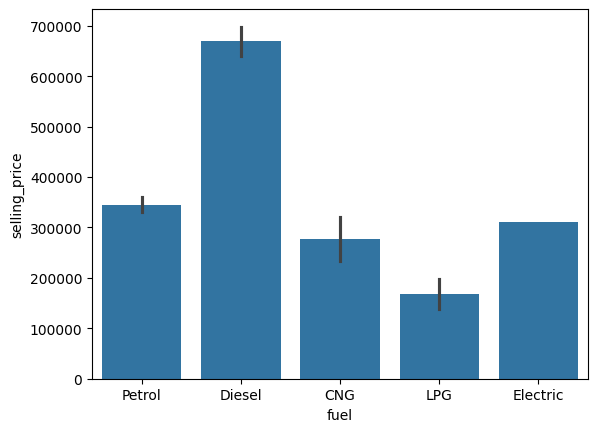

In [173]:
# This graph tells us that what is the average car price based on its fuel type.
sns.barplot(x=cars['fuel'],y=cars['selling_price'])

<Axes: xlabel='fuel', ylabel='km_driven'>

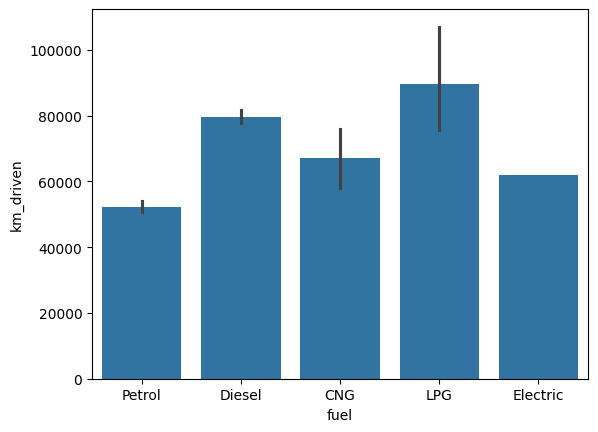

In [174]:
# this graph shows that what is the average of car driven based on fuel type.
# As we can see here LPG cars are mostly driven and second is diesel driven.
sns.barplot(x=cars['fuel'],y=cars['km_driven'])

In [175]:
# As we can see in car names mostly cars first name starts with its brand name.
cars['name']

0                             Maruti 800 AC
1                  Maruti Wagon R LXI Minor
2                      Hyundai Verna 1.6 SX
3                    Datsun RediGO T Option
4                     Honda Amaze VX i-DTEC
                       ...                 
4335    Hyundai i20 Magna 1.4 CRDi (Diesel)
4336             Hyundai i20 Magna 1.4 CRDi
4337                    Maruti 800 AC BSIII
4338       Hyundai Creta 1.6 CRDi SX Option
4339                       Renault KWID RXT
Name: name, Length: 4340, dtype: object

In [176]:
# lets take out the brand name 
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip(' ')

In [177]:
cars['name'] = cars['name'].apply(get_brand_name)

In [178]:
cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [179]:
cars['name'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [180]:
cars['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [181]:
cars['selling_price'].unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [182]:
cars['km_driven'].unique()

array([ 70000,  50000, 100000,  46000, 141000, 125000,  25000,  60000,
        78000,  35000,  24000,   5000,  33000,  28000,  59000,   4500,
       175900,  14500,  15000,  33800, 130400,  80000,  10000, 119000,
        75800,  40000,  74000,  64000, 120000,  79000,  18500,  10200,
        29000,  90000,  73300,  92000,  66764, 350000, 230000,  31000,
        39000, 166000, 110000,  54000,  63000,  76000,  11958,  20000,
         9000,   6500,  58000,  62200,  34000,  53000,  49000,  63500,
         9800,  13000,  21000,  29173,  48000,  30000,  87000,  16000,
        79350,  81000,   3600,  14272,  49213,  57000,   3240, 114000,
        53772, 140000, 175000,  36000, 155500,  23000,  22155,  78380,
       150000,  80362,  55000,   1136,  43000,   2650, 115962,  65000,
        56000, 213000, 139000, 160000, 163000,  32000,  52000,  11240,
        66000,  26500,  72000,  44000, 130000, 195000, 155000,   4000,
        41000,  10832,  14681,  51000, 200000,  19600,  46730,  21170,
      

In [183]:
cars['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [184]:
cars['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [185]:
cars['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [186]:
cars['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

### now we transform categorical columns into numerical manually

In [187]:
cars['name'].replace(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'],
       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\3795775522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['name'].replace(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
C:\Users\hp\AppData\Local\Temp\ipykernel_8796\3795775522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [188]:
cars['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [189]:
cars['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\1697960805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8796\1697960805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['tra

In [190]:
cars['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [191]:
cars['fuel'].replace(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
                     [1,2,3,4,5],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\2803906273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['fuel'].replace(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'],
C:\Users\hp\AppData\Local\Temp\ipykernel_8796\2803906273.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['fuel'].

In [192]:
cars['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [193]:
cars['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\1966054333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'],[1,2,3],inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_8796\1966054333.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [194]:
cars['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [195]:
cars['owner'].replace(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'],[1,2,3,4,5],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8796\4237795904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['owner'].replace(['First Owner', 'Second Owner', 'Fourth & Above Owner',
C:\Users\hp\AppData\Local\Temp\ipykernel_8796\4237795904.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars

### here we have all columns in numerical format

In [196]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,1,2007,60000,70000,1,1,1,1
1,1,2007,135000,50000,1,1,1,1
2,2,2012,600000,100000,2,1,1,1
3,3,2017,250000,46000,1,1,1,1
4,4,2014,450000,141000,2,1,1,2


In [197]:
X = cars.drop(columns=['selling_price','name'])
y = cars['selling_price']

### here we will build our ml model

#### Model - 1 (Direct Model using Linear Regression)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
lr = LinearRegression()

In [200]:
lr.fit(X_train,y_train)

LinearRegression()

In [201]:
y_pred = lr.predict(X_test)

In [202]:
print('MAE : ',mean_absolute_error(y_test,y_pred))

MAE :  221556.3644364786


In [203]:
print('MSE : ',mean_squared_error(y_test,y_pred))

MSE :  186947375734.54788


In [204]:
print('RMSE : ',root_mean_squared_error(y_test,y_pred))

RMSE :  432374.1154770344


In [205]:
print('R2 Score : ',r2_score(y_test,y_pred))

R2 Score :  0.387399808372071


#### Model - 2 (I make this model by referencing a youtube video)

URL - https://www.youtube.com/watch?v=iRCaMnR_bpA&t=1982s

In [206]:
cars2 = pd.read_csv('CarPricePrediction.csv')

In [207]:
cars2['name'] = cars2['name'].apply(get_brand_name)

In [208]:
cars2.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner


In [209]:
X2 = cars2.drop(columns=['selling_price'])
y2 = cars2['selling_price']

In [210]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [212]:
ohe = OneHotEncoder()
ohe.fit(X2[['name','fuel','seller_type','transmission','owner']])

OneHotEncoder()

In [213]:
col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner']),remainder='passthrough')

In [214]:
lr2 = LinearRegression()

In [215]:
pipe = make_pipeline(col_trans,lr)

In [216]:
pipe.fit(X_train2,y_train2)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
       'Jeep', 'Kia', 'Land', 'MG', 'Mahindra', 'Maruti', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'OpelCorsa'...
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['First Owner', 'Fourth & Above Owner', 'Second Owner',
       'Test Drive Car', 'Third Owner'], dtype=object)]),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('linearregression', LinearRegression())])

In [217]:
y_pred2 = pipe.predict(X_test2)

In [218]:
r2_score(y_test2,y_pred)

0.387399808372071

In [219]:
# checking on which random state r2 score is maximum
scores = []
for i in range(1000):
    X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=i)
    lr2 = LinearRegression()
    pipe = make_pipeline(col_trans,lr2)
    pipe.fit(X_train2,y_train2)
    y_pred2 = pipe.predict(X_test2)
    scores.append(r2_score(y_test2,y_pred))

In [220]:
np.argmax(scores)

np.int64(42)

In [221]:
scores[42]

0.387399808372071

#### Model - 3 (Using chatgpt 😅)

In [222]:
cars3 = pd.read_csv('CarPricePrediction.csv')

In [223]:
X3 = cars3.drop(columns=['selling_price', 'name'])
y3 = cars3['selling_price']

In [224]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [225]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), ['fuel', 'seller_type', 'transmission', 'owner'])
], remainder='passthrough')


In [226]:
from sklearn.pipeline import Pipeline
linreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [227]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


In [228]:
linreg_pipeline.fit(X_train3, y_train3)
rf_pipeline.fit(X_train3, y_train3)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [229]:
linreg_preds = linreg_pipeline.predict(X_test3)
rf_preds = rf_pipeline.predict(X_test3)

In [230]:
# Accuracy of Linear regression
print('R2 Score : ',r2_score(y_test, linreg_preds))
print('MAE : ',mean_absolute_error(y_test, linreg_preds))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, linreg_preds)))

R2 Score :  0.4031303601433036
MAE :  221706.36930922023
RMSE :  426786.68998722645


In [231]:
# Accuracy of Random Forest Regression
print('R2 Score : ',r2_score(y_test, rf_preds))
print('MAE : ',mean_absolute_error(y_test,rf_preds))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, rf_preds)))

R2 Score :  0.49865940598690284
MAE :  168199.95963999833
RMSE :  391144.79735869844
